In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [4]:
X=df[['installment','days.with.cr.line','revol.bal','revol.util']]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   installment        9578 non-null   float64
 1   days.with.cr.line  9578 non-null   float64
 2   revol.bal          9578 non-null   int64  
 3   revol.util         9578 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 299.4 KB


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#scaler.fit(df[['installment','days.with.cr.line','revol.bal']])
df[['installment','days.with.cr.line','revol.bal','revol.util']]=scaler.fit_transform(df[['installment','days.with.cr.line','revol.bal','revol.util']])

In [6]:
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,2.463099,11.350407,19.48,737,0.432230,0.353732,0.182704,0,0,0,0
1,1,credit_card,0.1071,-0.438854,11.082143,14.29,707,-0.721230,0.495018,1.030602,0,0,0,0
2,1,debt_consolidation,0.1357,0.230708,10.373491,11.63,682,0.059770,-0.397073,-0.730683,1,0,0,0
3,1,debt_consolidation,0.1008,-0.757022,11.350407,8.10,712,-0.745277,0.496321,0.909966,1,0,0,0
4,1,credit_card,0.1426,-1.043992,11.299732,14.97,667,-0.198161,-0.360663,-0.251586,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,0.123976,12.180755,10.39,672,2.368325,5.879467,1.216726,2,0,0,1
9574,0,all_other,0.1253,-0.296481,11.141862,0.21,722,-0.072400,-0.495638,-1.575135,5,0,0,1
9575,0,debt_consolidation,0.1071,-1.068670,10.596635,13.09,687,-0.444860,-0.203765,1.244300,8,0,0,1
9576,0,home_improvement,0.1600,0.156914,10.819778,19.18,692,-1.105722,-0.501089,-1.502753,5,0,0,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   float64
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(7), int64(6), object(1)
memory usage: 1.0+ MB


In [8]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [9]:
df['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [10]:
df_a = pd.crosstab(df['purpose'],df['not.fully.paid'])

In [11]:
df['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

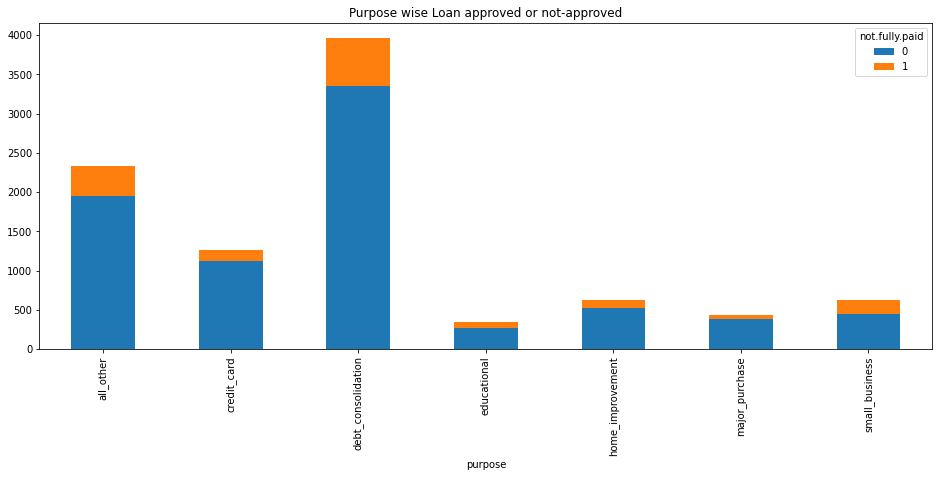

In [12]:
df_a.plot(kind='bar',figsize=(16,6),stacked=True,title="Purpose wise Loan approved or not-approved")
plt.show()

In [13]:
purpose_list = df['purpose'].value_counts().index
purpose_value = df['purpose'].value_counts().values

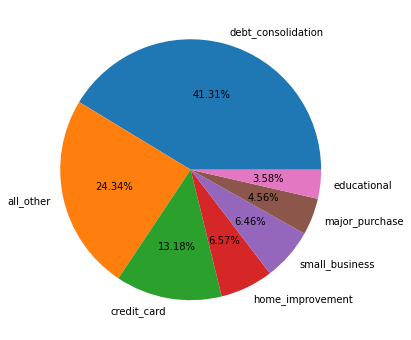

In [14]:
plt.figure(figsize=(6,6))
plt.pie(purpose_value,labels=purpose_list,autopct='%1.02f%%')
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['purpose'] = le.fit_transform(df['purpose'])
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,2.463099,11.350407,19.48,737,0.432230,0.353732,0.182704,0,0,0,0
1,1,1,0.1071,-0.438854,11.082143,14.29,707,-0.721230,0.495018,1.030602,0,0,0,0
2,1,2,0.1357,0.230708,10.373491,11.63,682,0.059770,-0.397073,-0.730683,1,0,0,0
3,1,2,0.1008,-0.757022,11.350407,8.10,712,-0.745277,0.496321,0.909966,1,0,0,0
4,1,1,0.1426,-1.043992,11.299732,14.97,667,-0.198161,-0.360663,-0.251586,0,1,0,0


In [16]:
import seaborn as sns

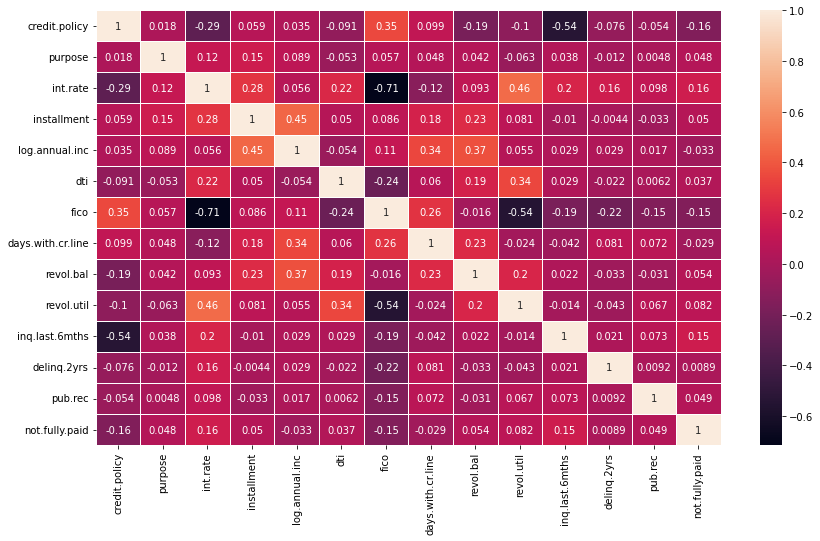

In [17]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True,linewidths=.5)
plt.show()

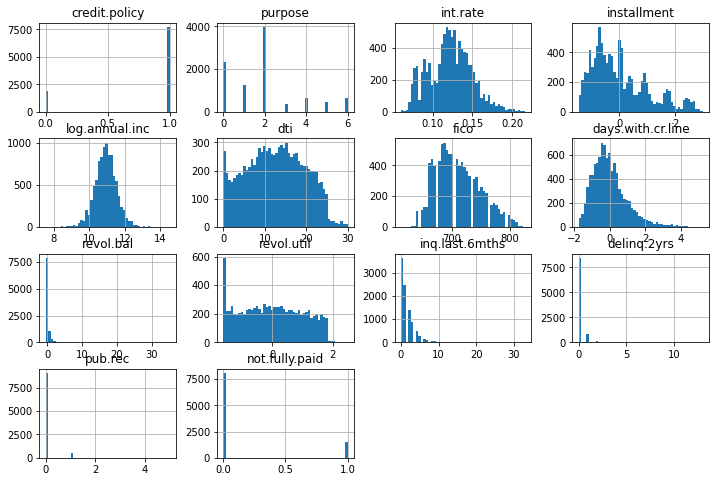

In [18]:
df.hist(bins=50, figsize=(12, 8)); #kde=True

<AxesSubplot:>

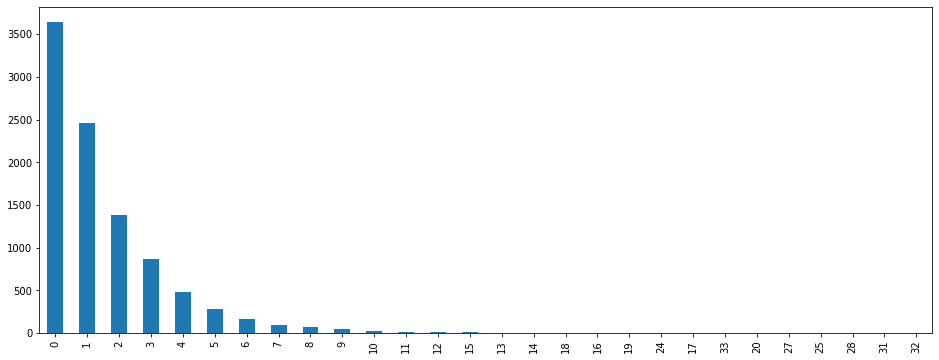

In [19]:
df['inq.last.6mths'].value_counts().plot(kind='bar',figsize=(16,6))

In [20]:
x = df.iloc[:,:-1]
x.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,1,2,0.1189,2.463099,11.350407,19.48,737,0.432230,0.353732,0.182704,0,0,0
1,1,1,0.1071,-0.438854,11.082143,14.29,707,-0.721230,0.495018,1.030602,0,0,0
2,1,2,0.1357,0.230708,10.373491,11.63,682,0.059770,-0.397073,-0.730683,1,0,0
3,1,2,0.1008,-0.757022,11.350407,8.10,712,-0.745277,0.496321,0.909966,1,0,0
4,1,1,0.1426,-1.043992,11.299732,14.97,667,-0.198161,-0.360663,-0.251586,0,1,0


In [21]:
y = df.iloc[:,13:]
y.head()

,not.fully.paid
0,0
1,0
2,0
3,0
4,0


In [22]:
columns = x.columns
columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec'],
      dtype='object')

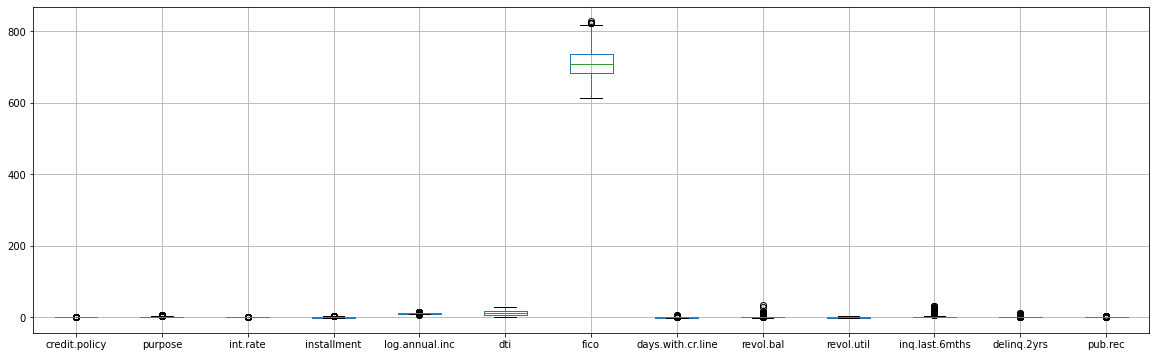

In [23]:
plt.figure(figsize=(20,6))
x.boxplot()
plt.show()


In [24]:
for col in columns:
    Q3 = x[col].quantile(0.75)
    Q1 = x[col].quantile(0.25)
    IQR = Q3 - Q1
    UB = Q3 + 1.5 * IQR
    LB = Q1 - 1.5 * IQR
    x[col]  =  x[col].apply(lambda x: LB if x < LB else x)
    x[col]  =x[col].apply(lambda x: UB if x > UB else x)

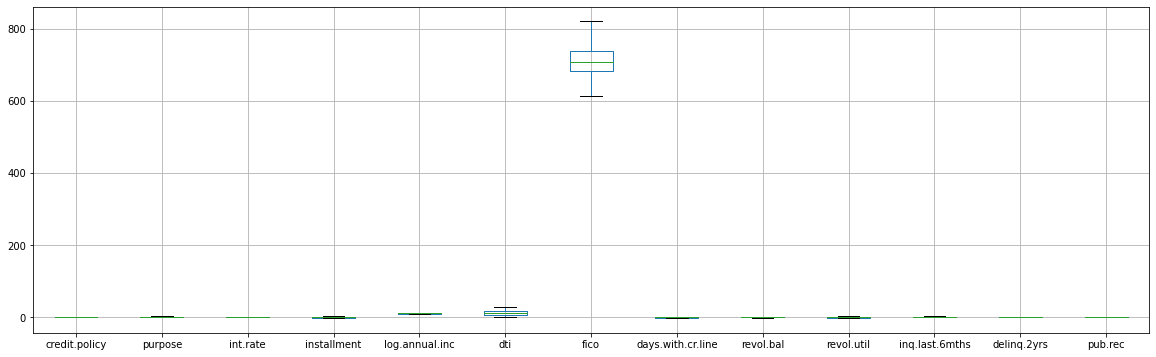

In [25]:
plt.figure(figsize=(20,6))
x.boxplot()
plt.show()

In [26]:
threshold=0.7
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr


In [27]:
correlation(x,threshold)

{'fico'}

In [28]:
x = x.drop('fico',axis = 1)

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=7)

In [32]:
x_train.shape ,y_train.shape , x_test.shape ,y_test.shape

((7662, 12), (7662, 1), (1916, 12), (1916, 1))

In [33]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from keras import optimizers


In [38]:
import tensorflow as tf
early_stop = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        mode='min', 
        verbose=1, 
        patience=25
)

In [39]:
#predictions = model_new.predict_classes(x_test)

#print(confusion_matrix(y_test,predictions), '\n', classification_report(y_test,predictions))

In [52]:
model = Sequential()
model.add(
        Dense(12, activation='relu')
)
model.add(
        Dense(127, activation='relu')
)
model.add(
        Dense(256, activation='relu')
)
model.add(Dropout(0.2))
model.add(
        Dense(527, activation='relu')
)
model.add(Dropout(0.2))
model.add(
        Dense(1, activation='sigmoid')
)

In [53]:
from tensorflow.keras.optimizers import SGD, Adagrad, RMSprop, Adam
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics='accuracy')

In [54]:
history = model.fit(x_train, y_train,batch_size=3,verbose=1, validation_data=(x_test, y_test), epochs=50,callbacks=[early_stop])

Epoch 1/50
2554/2554 [==============================] - 12s 4ms/step - loss: 0.4392 - accuracy: 0.8392 - val_loss: 0.4189 - val_accuracy: 0.8424
Epoch 2/50
2554/2554 [==============================] - 12s 5ms/step - loss: 0.4256 - accuracy: 0.8395 - val_loss: 0.4223 - val_accuracy: 0.8424
Epoch 3/50
2554/2554 [==============================] - 11s 4ms/step - loss: 0.4222 - accuracy: 0.8393 - val_loss: 0.4208 - val_accuracy: 0.8424
Epoch 4/50
2554/2554 [==============================] - 11s 4ms/step - loss: 0.4210 - accuracy: 0.8393 - val_loss: 0.4156 - val_accuracy: 0.8424
Epoch 5/50
2554/2554 [==============================] - 12s 5ms/step - loss: 0.4205 - accuracy: 0.8393 - val_loss: 0.4119 - val_accuracy: 0.8424
Epoch 6/50
2554/2554 [==============================] - 11s 4ms/step - loss: 0.4180 - accuracy: 0.8393 - val_loss: 0.4256 - val_accuracy: 0.8424
Epoch 7/50
2554/2554 [==============================] - 11s 4ms/step - loss: 0.4167 - accuracy: 0.8392 - val_loss: 0.4137 - val_ac

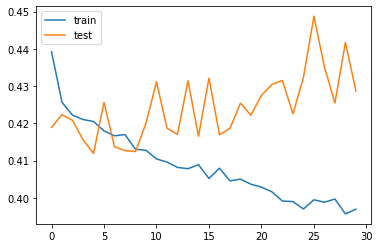

In [55]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

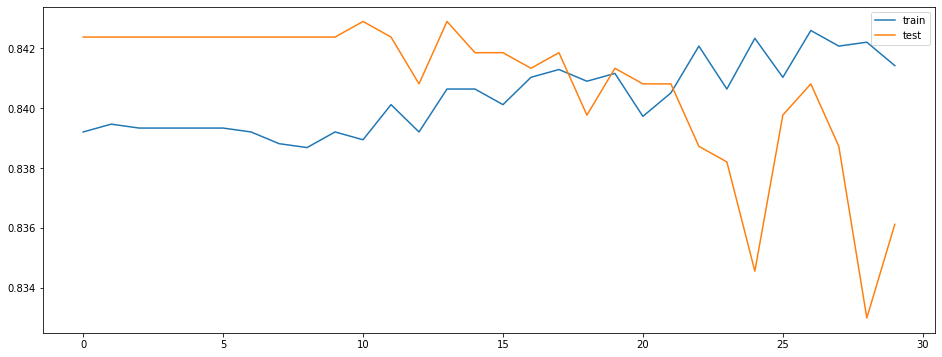

In [56]:
plt.figure(figsize=(16,6))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend();
plt.show()

In [77]:
y_pred = (model.predict(x_test)>0.75).astype("int32")

60/60 [==============================] - 0s 3ms/step


In [78]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [79]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,y_pred)

array([[1612,    2],
       [ 302,    0]], dtype=int64)

In [80]:
accuracy_score(y_test,y_pred)

0.8413361169102297